 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [189]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [144]:
# Reading whale returns
whale_returns_path = Path('Resources/whale_returns.csv')
whale_returns = pd.read_csv(whale_returns_path, parse_dates=True, infer_datetime_format=True, index_col='Date')
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [145]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [146]:
# Drop nulls
whale_returns = whale_returns.dropna().copy()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [147]:
# Reading algorithmic returns
algo_returns_path = Path('Resources/algo_returns.csv')
algo_returns = pd.read_csv(algo_returns_path, parse_dates=True, infer_datetime_format=True, index_col='Date')
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [148]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [149]:
# Drop nulls
algo_returns = algo_returns.dropna().copy()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [150]:
# Reading S&P 500 Closing Prices
sp500_history_path = Path('Resources/sp500_history.csv')
sp500_history = pd.read_csv(sp500_history_path, parse_dates=True, infer_datetime_format=True, index_col='Date')
sp500_history.sample(5)

,Close
Date,
2016-02-03,$1912.53
2018-09-20,$2930.75
2016-12-06,$2212.23
2014-09-25,$1965.99
2018-10-05,$2885.57


In [151]:
# Check Data Types
sp500_history['Close'] = sp500_history['Close'].str.replace('$', '')

sp500_history.dtypes

<ipython-input-151-a88dd3654d19>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_history['Close'] = sp500_history['Close'].str.replace('$', '')


Close    object
dtype: object

In [152]:
# Fix Data Types
sp500_history['Close'] = sp500_history['Close'].astype('float')

In [153]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [154]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna().copy()
sp500_daily_returns.isnull().sum()

Close    0
dtype: int64

In [155]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.columns = ['S&P500']
sp500_daily_returns.head()

,S&P500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [156]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([sp500_daily_returns, algo_returns, whale_returns], axis='columns', join='inner')
combined_df

,S&P500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-22,-0.008764,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088
2019-04-18,-0.001011,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916
2019-04-17,-0.001577,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-16,0.002279,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-15,-0.000509,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492
...,...,...,...,...,...,...,...
2015-03-09,0.017254,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
2015-03-06,-0.003929,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-05,0.014378,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

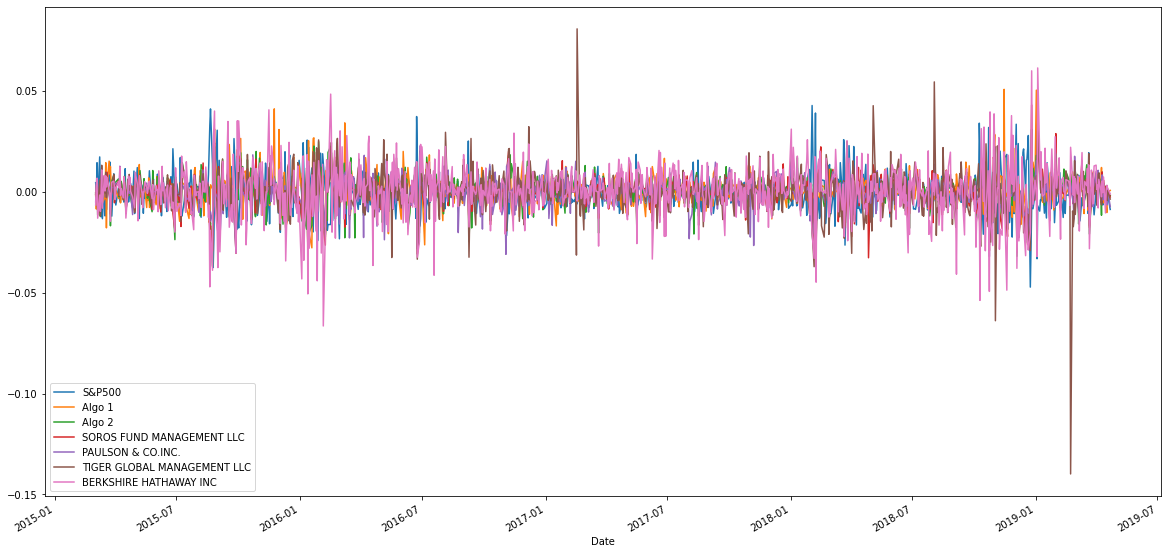

In [157]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

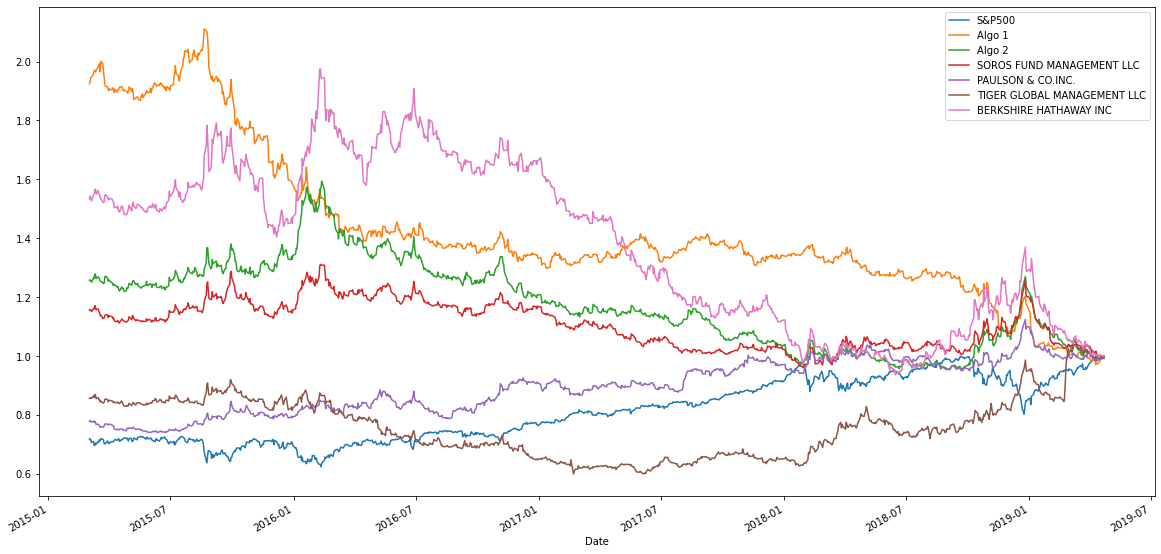

In [158]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Returns'}>

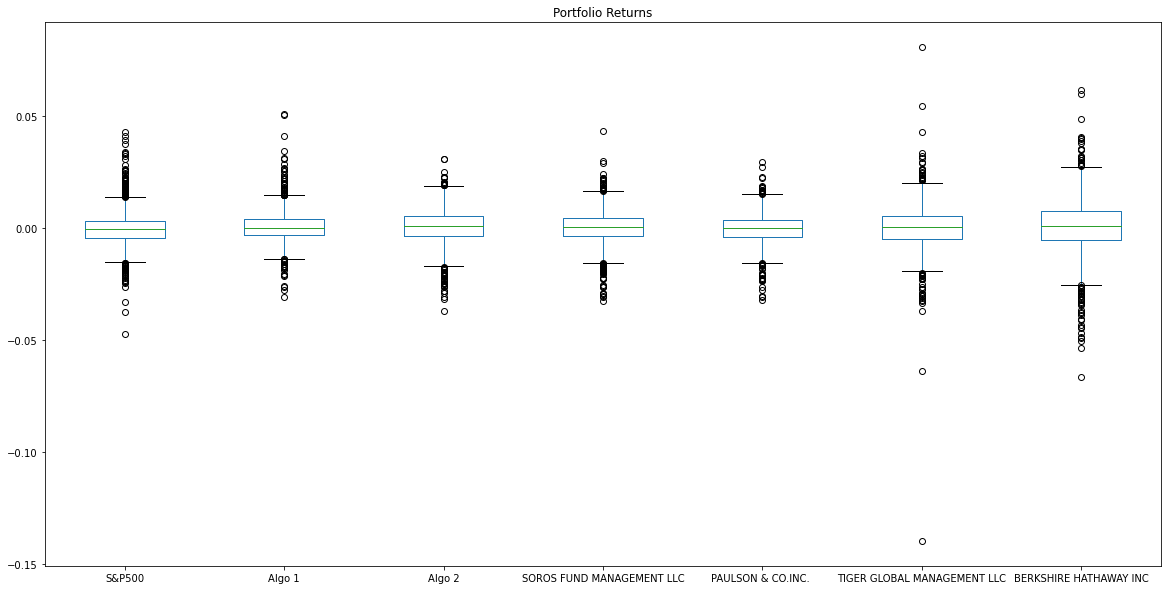

In [159]:
# Box plot to visually show risk
combined_df.plot.box(figsize=(20,10), title='Portfolio Returns')

### Calculate Standard Deviations

In [160]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_df.std()
daily_std.head()

S&P500                       0.008587
Algo 1                       0.007623
Algo 2                       0.008341
SOROS FUND MANAGEMENT LLC    0.007896
PAULSON & CO.INC.            0.007026
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [161]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = round(daily_std['S&P500'], 5)
print(f'The Standard Deviation of S&P 500 is {sp500_std}')
# Determine which portfolios are riskier than the S&P 500
daily_std = daily_std.sort_values(ascending=False)
daily_std

The Standard Deviation of S&P 500 is 0.00859


BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P500                         0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

### Calculate the Annualized Standard Deviation

In [162]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P500                         0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviations'}, xlabel='Date'>

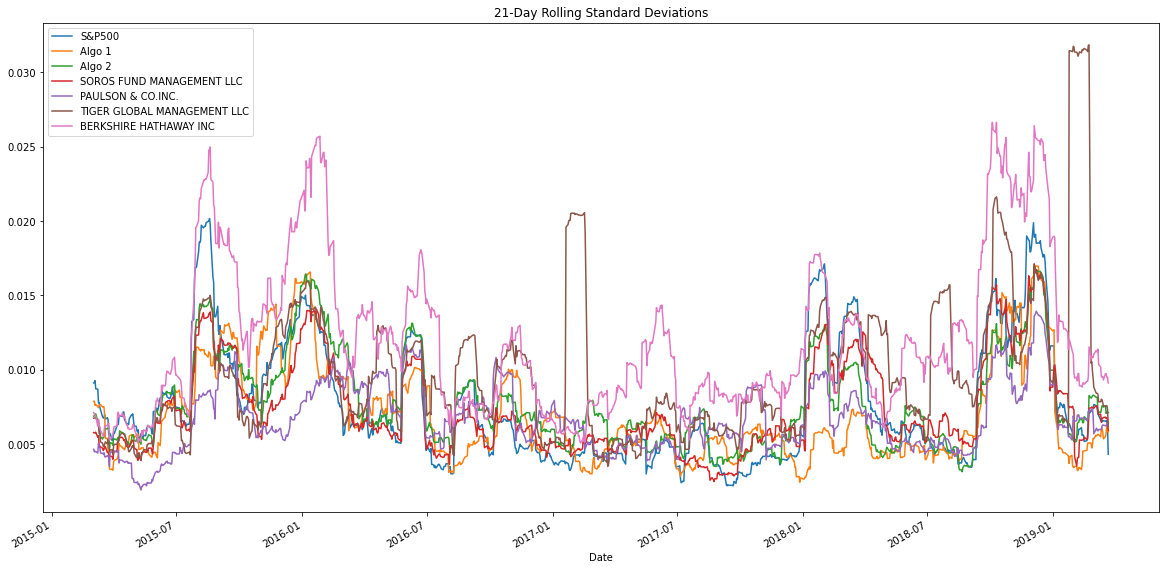

In [163]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_21 = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std_21.plot(figsize=(20,10), title='21-Day Rolling Standard Deviations')

### Calculate and plot the correlation

In [164]:
# Calculate the correlation
correlation = combined_df.corr()
# Display de correlation matrix
correlation

,S&P500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
S&P500,1.000000,-0.033963,-0.002192,0.000574,0.013549,-0.001505,-0.013856
Algo 1,-0.033963,1.000000,0.287852,0.320901,0.268631,0.164114,0.291678
Algo 2,-0.002192,0.287852,1.000000,0.826730,0.678085,0.507160,0.687756
SOROS FUND MANAGEMENT LLC,0.000574,0.320901,0.826730,1.000000,0.699823,0.561040,0.754157
PAULSON & CO.INC.,0.013549,0.268631,0.678085,0.699823,1.000000,0.434308,0.545451
TIGER GLOBAL MANAGEMENT LLC,-0.001505,0.164114,0.507160,0.561040,0.434308,1.000000,0.424125
BERKSHIRE HATHAWAY INC,-0.013856,0.291678,0.687756,0.754157,0.545451,0.424125,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Beta Trend for SOROS FUND MANAGEMENT LLC'}, xlabel='Date'>

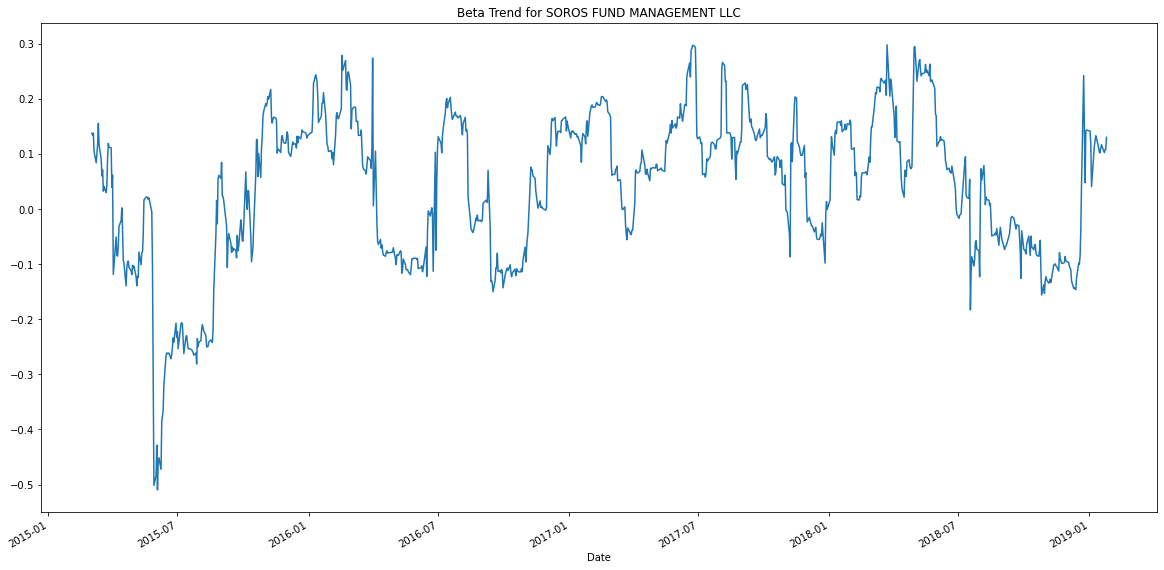

In [206]:
# Calculate covariance of a single portfolio
covariance_soros = combined_df['SOROS FUND MANAGEMENT LLC'].cov(combined_df['S&P500'])
# Calculate variance of S&P 500
variance_sp500 = combined_df['S&P500'].var()
# Computing beta
soros_beta = covariance_soros / variance_sp500
# Plot beta trend
# Will use 60-Day rolling Beta to plot trend
soros_rolling_covariance = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_df['S&P500'])
soros_rolling_variance = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).var()
soros_rolling_beta = soros_rolling_covariance / soros_rolling_variance
soros_rolling_beta.plot(figsize=(20,10), title='Beta Trend for SOROS FUND MANAGEMENT LLC')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [166]:
# Use `ewm` to calculate the rolling window
times = combined_df.index
combined_df.ewm(halflife='21 days', times=pd.DatetimeIndex(times)).mean()

,S&P500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-22,-0.008764,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088
2019-04-18,-0.005143,0.000086,-0.001606,-0.000702,-0.003337,-0.001668,0.000315
2019-04-17,-0.004033,-0.003147,-0.002733,-0.001385,-0.004311,-0.002522,0.001220
2019-04-16,-0.002572,-0.004026,-0.001430,-0.000440,-0.003224,-0.002130,0.001131
2019-04-15,-0.002195,-0.004082,-0.002004,-0.000619,-0.002846,-0.001668,-0.000995
...,...,...,...,...,...,...,...
2015-03-09,-0.001630,0.000177,0.000880,0.001244,-0.000152,-0.000660,0.001744
2015-03-06,-0.001630,0.000177,0.000880,0.001244,-0.000152,-0.000660,0.001744
2015-03-05,-0.001630,0.000177,0.000880,0.001244,-0.000152,-0.000660,0.001744


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [167]:
# Annualized Sharpe Ratios
sharpe_ratios = ((combined_df.mean()-combined_df['S&P500'].mean()) * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

S&P500                         0.000000
Algo 1                         1.953767
Algo 2                         1.018189
SOROS FUND MANAGEMENT LLC      0.906838
PAULSON & CO.INC.              0.142411
TIGER GLOBAL MANAGEMENT LLC    0.278448
BERKSHIRE HATHAWAY INC         0.951436
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

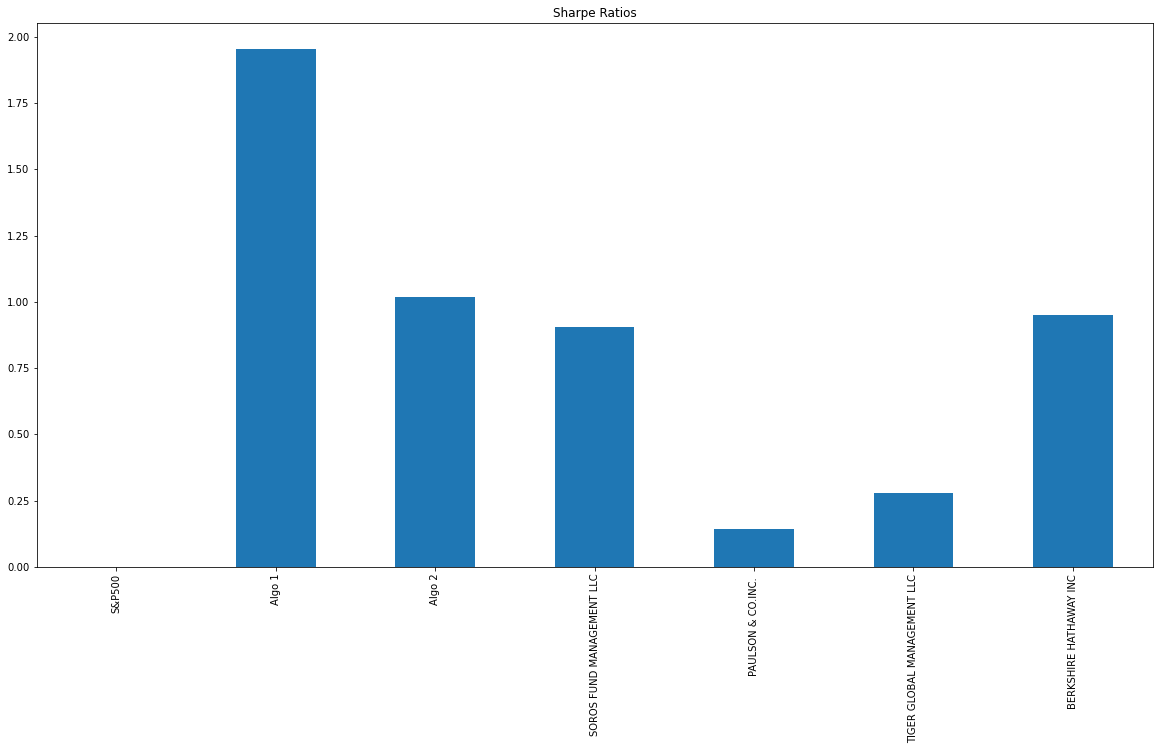

In [168]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', figsize=(20,10), title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [169]:
#The Algorithmic Trading Strategies are able to outperform the S&P 500 as well as the whales portfolios. When taking into account the risk tolerance
#of the portfolios, the Algorithmic Trading Strategies tend to perform higher and in the case of Algo 1, it dwarfs the other portfolios in terms of
#performance.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [170]:
# Reading data from 1st stock
goog_path = Path('Resources/goog_historical.csv')
goog_df = pd.read_csv(goog_path, infer_datetime_format=True, parse_dates=True, index_col='Trade DATE')
goog_df.sort_index(inplace=True)
goog_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [171]:
# Reading data from 2nd stock
aapl_path = Path('Resources/aapl_historical.csv')
aapl_df = pd.read_csv(aapl_path, infer_datetime_format=True, parse_dates=True, index_col='Trade DATE')
aapl_df.sort_index(inplace=True)
aapl_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [172]:
# Reading data from 3rd stock
cost_path = Path('Resources/cost_historical.csv')
cost_df = pd.read_csv(cost_path, infer_datetime_format=True, parse_dates=True, index_col='Trade DATE')
cost_df.sort_index(inplace=True)
cost_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [173]:
# Combine all stocks in a single DataFrame
portfolio_df = pd.concat([goog_df, aapl_df, cost_df], axis='rows', join='inner')
portfolio_df

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59
...,...,...
2019-05-03,COST,244.62
2019-05-06,COST,244.23
2019-05-07,COST,240.18


In [174]:
# Reset Date index
portfolio_df = portfolio_df.reset_index()
portfolio_df

,Trade DATE,Symbol,NOCP
0,2018-05-11,GOOG,1098.26
1,2018-05-14,GOOG,1100.20
2,2018-05-15,GOOG,1079.23
3,2018-05-16,GOOG,1081.77
4,2018-05-17,GOOG,1078.59
...,...,...,...
745,2019-05-03,COST,244.62
746,2019-05-06,COST,244.23
747,2019-05-07,COST,240.18
748,2019-05-08,COST,241.34


In [175]:
# Reorganize portfolio data by having a column per symbol
portfolio_df = portfolio_df.pivot_table(values='NOCP', index='Trade DATE', columns='Symbol')
portfolio_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [176]:
# Calculate daily returns
daily_returns = portfolio_df.pct_change()
# Drop NAs
daily_returns.isnull().sum()
daily_returns.dropna().copy()
# Display sample data
daily_returns.sample(5)

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2019-04-11,-0.008324,-0.017792,0.002046
2019-01-14,-0.015037,-0.007173,-0.011824
2018-07-11,-0.012976,-0.003543,0.000919
2018-11-12,-0.050374,-0.013712,-0.025813
2018-11-21,-0.001130,-0.003374,0.011552


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [177]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)
# Display sample data
portfolio_returns.head()

Trade DATE
2018-05-11         NaN
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [178]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolio = pd.concat([combined_df, portfolio_returns], axis='columns', join='inner')
columns = ['S&P500', 'Algo 1', 'Algo 2', 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Weighted Portfolio']
combined_portfolio.columns = columns
combined_portfolio.tail()

,S&P500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Weighted Portfolio
2018-05-17,0.002639,-0.006949,0.005205,-0.001955,0.002524,-0.006267,-0.005140,-0.001595
2018-05-16,0.000857,-0.002326,0.003341,0.008637,0.006244,0.005480,0.004310,0.009403
2018-05-15,-0.004044,-0.001135,-0.001139,-0.000726,-0.001409,-0.003189,-0.014606,-0.010064
2018-05-14,0.006889,0.000915,0.001635,0.000000,0.000000,0.000000,0.000000,0.000015
2018-05-11,-0.000883,0.000358,0.000281,-0.004717,0.000982,0.002624,-0.004125,NaN


In [179]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
clean_portfolio = combined_portfolio.dropna()
clean_portfolio.isnull().sum()

S&P500                         0
Algo 1                         0
Algo 2                         0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Weighted Portfolio             0
dtype: int64

In [208]:
#Check portfolio null
clean_portfolio.tail()

,S&P500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Weighted Portfolio
2018-05-18,-0.007333,0.002557,-0.002496,-0.004357,-0.002672,-0.012832,-0.002212,-0.006061
2018-05-17,0.002639,-0.006949,0.005205,-0.001955,0.002524,-0.006267,-0.005140,-0.001595
2018-05-16,0.000857,-0.002326,0.003341,0.008637,0.006244,0.005480,0.004310,0.009403
2018-05-15,-0.004044,-0.001135,-0.001139,-0.000726,-0.001409,-0.003189,-0.014606,-0.010064
2018-05-14,0.006889,0.000915,0.001635,0.000000,0.000000,0.000000,0.000000,0.000015


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [182]:
# Calculate the annualized `std`
daily_std = clean_portfolio.std()
annualized_std = daily_std * np.sqrt(252)
annualized_std

S&P500                         0.152469
Algo 1                         0.133927
Algo 2                         0.139499
SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Weighted Portfolio             0.211627
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation'}>

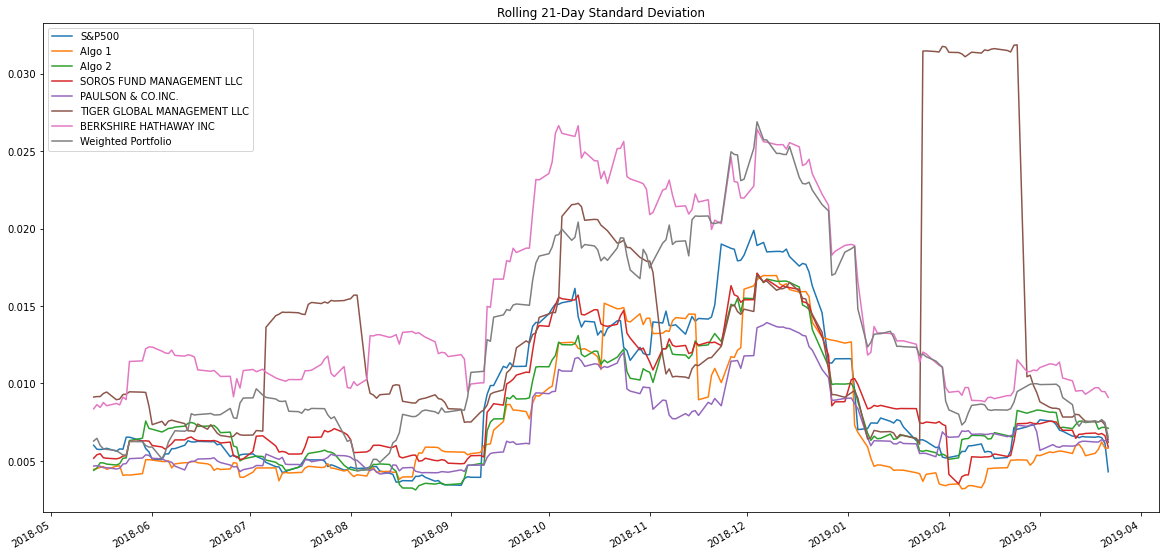

In [185]:
# Calculate rolling standard deviation
rolling21_std = clean_portfolio.rolling(window=21).std()
# Plot rolling standard deviation
rolling21_std.plot(figsize=(20,10), title='Rolling 21-Day Standard Deviation')

### Calculate and plot the correlation

<AxesSubplot:>

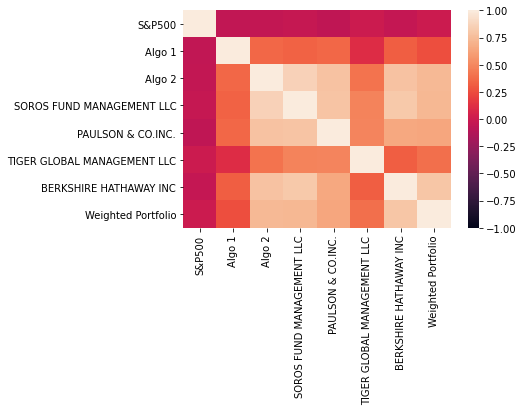

In [194]:
# Calculate and plot the correlation
correlation = clean_portfolio.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'60-Day Rolling Beta of Weighted Portfolio'}>

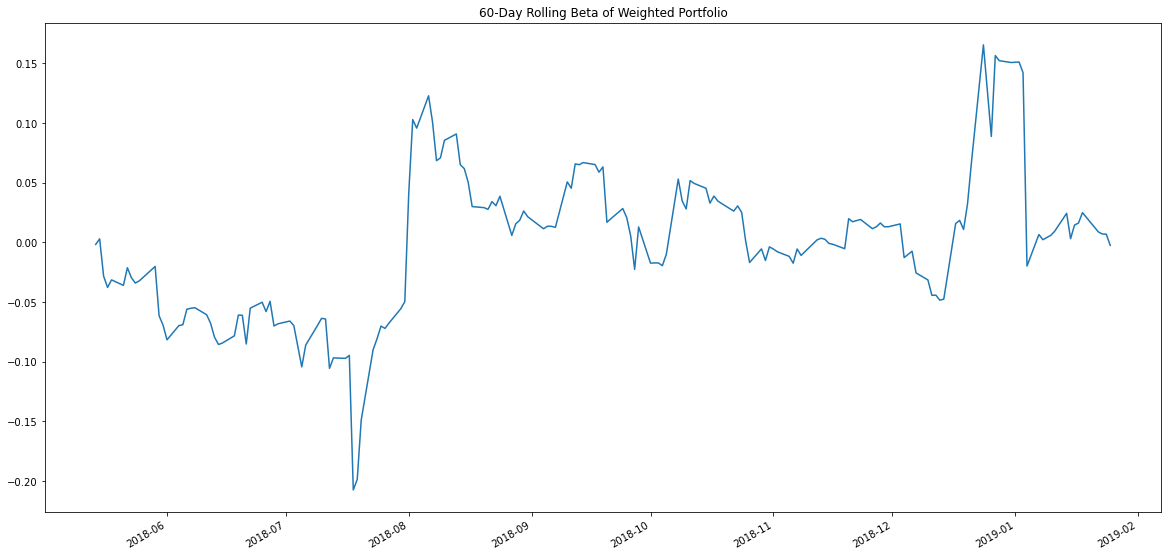

In [202]:
# Calculate and plot Beta
portfolio_rolling_covariance = clean_portfolio['Weighted Portfolio'].rolling(window=60).cov(clean_portfolio['S&P500'])
portfolio_rolling_variance = clean_portfolio['Weighted Portfolio'].rolling(window=60).var()
portfolio_rolling_beta = portfolio_rolling_covariance / portfolio_rolling_variance
portfolio_rolling_beta.plot(figsize=(20,10), title='60-Day Rolling Beta of Weighted Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [196]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = ((clean_portfolio.mean() - clean_portfolio['S&P500'].mean()) * 252) / (clean_portfolio.std() * np.sqrt(252))
sharpe_ratios

S&P500                         0.000000
Algo 1                         2.488145
Algo 2                         0.474771
SOROS FUND MANAGEMENT LLC      0.824162
PAULSON & CO.INC.              0.785247
TIGER GLOBAL MANAGEMENT LLC   -0.786653
BERKSHIRE HATHAWAY INC         0.366677
Weighted Portfolio             1.184275
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios in Relation to S&P 500'}>

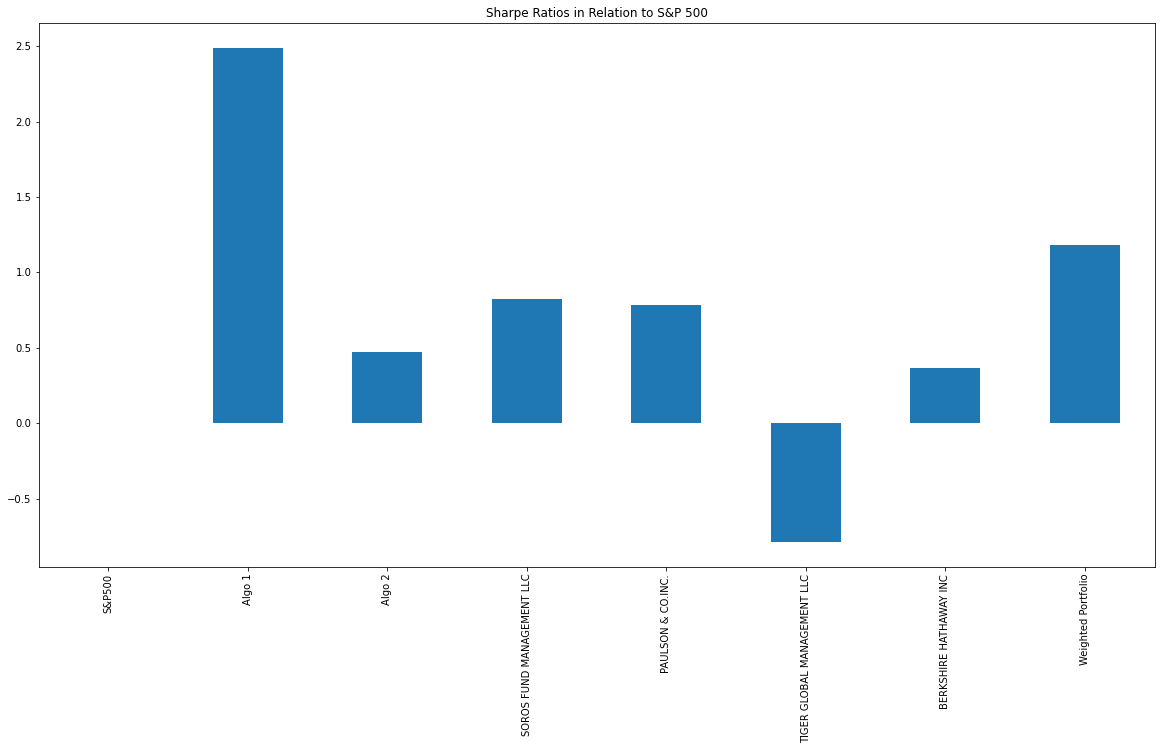

In [198]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', figsize=(20,10), title='Sharpe Ratios in Relation to S&P 500')

### How does your portfolio do?

Write your answer here!

In [ ]:
#The Weighted Portfolio is a strong portfolio when taking into account the risk tolerance of the portfolio. The Weighted Portfolio more often than
#not outperforms the S&P 500, as shown by the rolling 60-day beta trend for the portfolio. Compared to the other whale portfolios, the Weighted 
#Portfolio has better returns even when taking into account the risk of that the portfolio takes on. When comparing the Weighted Portfolio to the 
#Algorithmic Trading Strategies, the Weighted Portfolio is able to produce better results than Algo 2 but is no match for Algo 1. Overall, the 
#Weighted Portfolio has a strong overall performance and is able to produce higher returns than most of the other portfolios that are being compared.